<a href="https://colab.research.google.com/github/nvp951753/Doan-Le-Nhat-Nam-19146360/blob/main/monanvn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/drive/MyDrive/dataset/fooddata.zip

Streaming output truncated to the last 5000 lines.
  inflating: dttrain/2496.jpg        
  inflating: dttrain/2497.jpg        
  inflating: dttrain/2498.jpg        
  inflating: dttrain/2499.jpg        
  inflating: dttrain/25.jpg          
  inflating: dttrain/250.jpg         
  inflating: dttrain/2500.jpg        
  inflating: dttrain/2501.jpg        
  inflating: dttrain/2502.jpg        
  inflating: dttrain/2503.jpg        
  inflating: dttrain/2504.jpg        
  inflating: dttrain/2505.jpg        
  inflating: dttrain/2506.jpg        
  inflating: dttrain/2507.jpg        
  inflating: dttrain/2508.jpg        
  inflating: dttrain/2509.jpg        
  inflating: dttrain/251.jpg         
  inflating: dttrain/2510.jpg        
  inflating: dttrain/2511.jpg        
  inflating: dttrain/2512.jpg        
  inflating: dttrain/2513.jpg        
  inflating: dttrain/2514.jpg        
  inflating: dttrain/2515.jpg        
  inflating: dttrain/2516.jpg        
  inflating: dttrain/2517.jpg        

In [2]:
import glob
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras.utils as u

In [ ]:
type(filenames[0])

str

In [3]:
filenames = [img for img in glob.glob("dttrain/*.jpg")]
x_train = []
y_train = []
for img in filenames:
  n = cv2.imread(img)
  a=img.split('/',1)
  a=a[1]
  ten = int(a[0])
  x_train.append(n)
  y_train.append(ten)

x_train= np.array(x_train).astype('float32')
x_train/=255
y_train=to_categorical(y_train)
y_train= np.array(y_train).astype('float32')


In [ ]:
x_train[0].shape

(100, 100, 3)

In [4]:
model = Sequential()
model.add(Conv2D(100,(3,3),activation ='relu',kernel_initializer = 'he_uniform',padding = 'same',input_shape=(100,100,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(200,(3,3),activation ='relu',kernel_initializer = 'he_uniform',padding = 'same'))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(10, activation='softmax'))
model.summary()
opt = Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,batch_size=64,verbose=1,validation_split=0.1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 100)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 200)       180200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 200)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 125000)            0         
                                                                 
 dense (Dense)               (None, 256)               3

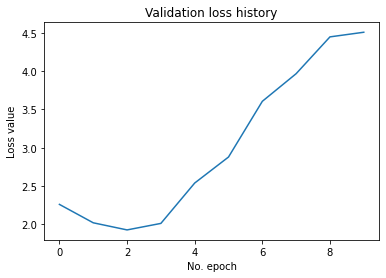

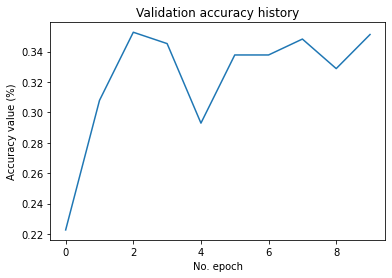

In [49]:
plt.plot(history.history['val_loss'])
plt.title('Validation loss history')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.show()

# Plot history: Accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Validation accuracy history')
plt.ylabel('Accuracy value (%)')
plt.xlabel('No. epoch')
plt.show()

dự đoán là: Banh mi


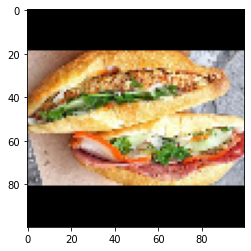

In [68]:
def make_square(img):
    '''
    Reshapes the non-square image by pasting
    it to the centre of a black canvas of size
    n*n where n is the biggest dimension of
    the non-square image. 
    '''
    #Getting the bigger side of the image
    s = max(img.shape[0:2])

    #Creating a dark square with NUMPY  
    f = np.zeros((s,s,3),np.uint8)

    #Getting the centering position
    ax,ay = (s - img.shape[1])//2,(s - img.shape[0])//2

    #Pasting the 'image' in a centering position
    f[ay:img.shape[0]+ay,ax:ax+img.shape[1]] = img
    return f
thuvien = ['Banh cuon','Banh gio','Banh mi','Banh tet','Banh trang nuong','Bun dau mam tom', 'Chao long', 'Com tam','Goi cuon','Pho']
tenfile = '204.jpg'
pre = u.load_img(tenfile)


pre= np.array(pre)
pre = make_square(pre)
pre = cv2.resize(pre, dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
show=pre
pre= np.array(pre).astype('float32')
pre/=255
pre = pre.reshape(-1,100,100,3)
er=np.argmax(model.predict(pre))
print('dự đoán là: ' + thuvien[er])
plt.imshow(show,cmap=plt.get_cmap('gray'))
plt.show()